## Import libraries

In [1]:
import numpy as np                   #large collection of high-level mathematical functions 
import pandas as pd                  #Used for data manipulation and analysis
import matplotlib.pyplot as plt      #Collection of command style functions
import seaborn as sns                #Data visualization library based on matplotlib

In [2]:
#sklearn- software machine learning library
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Reading Dataset

In [3]:
df = pd.read_csv("data.csv")


In [4]:
#Display dataset
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## Data Visualization

## Heatmap 

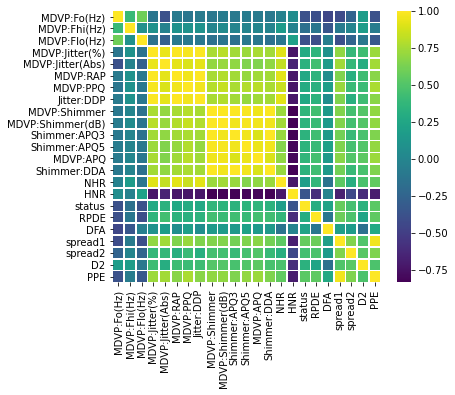

In [6]:
corr = df.corr()
# plot the heatmap
fig = plt.figure(figsize=(6,5))
sns.heatmap(corr,linewidths=.75,cmap= 'viridis')

### Bar Graph

Text(0.5, 1.0, 'Count of each Target Class')

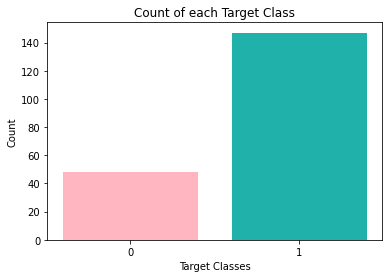

In [7]:
# plt.rcParams['figure.figsize'] = 6,4
plt.bar(df['status'].unique(), df['status'].value_counts(), color = ['lightseagreen', 'lightpink'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

### Histogram

<ipython-input-8-3b63bfaaf83b>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax,color='darkcyan')


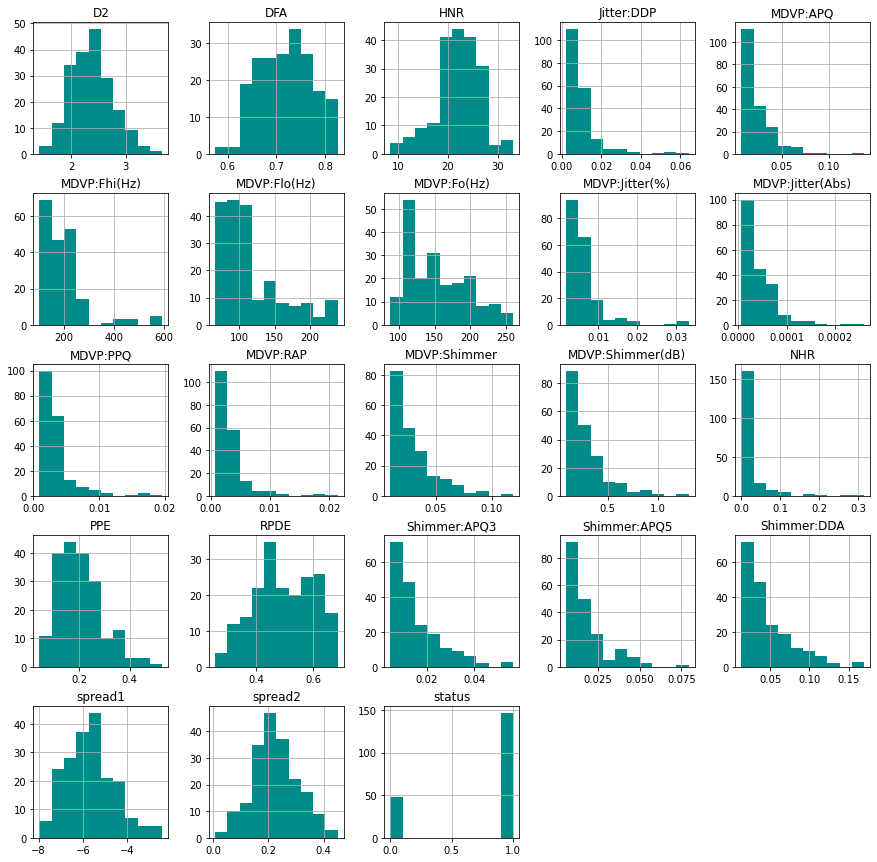

In [8]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()

df.hist(ax=ax,color='darkcyan')
plt.show()

## Data Preprocessing

In [9]:
correlation_values=df.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

In [10]:
# Checking null value sum
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## Spliting of Data 

In [11]:
y=df['status']
x=df.drop(['status','name'],axis=1)

In [12]:
train_size=0.70
test_size=0.30
seed=5

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)

## Naive Bayes Algorithm

In [13]:
#Create a Gaussian Classifier
nb = GaussianNB()

# Train the model using the training sets
nb.fit(x_train, y_train)

#Predict Output
nb_pred = nb.predict(x_test)

In [14]:
#Predicting the score
nb_score = accuracy_score(y_test, nb_pred)
nb_score

0.7627118644067796

              precision    recall  f1-score   support

           0       0.54      0.94      0.68        16
           1       0.97      0.70      0.81        43

    accuracy                           0.76        59
   macro avg       0.75      0.82      0.75        59
weighted avg       0.85      0.76      0.78        59



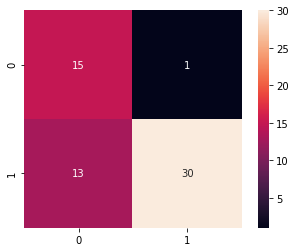

In [15]:
cf_matrix=confusion_matrix(y_test , nb_pred)
sns.heatmap(cf_matrix, annot=True,square=True)
print(classification_report(y_test , nb_pred)) 

## Support Vector Algorithm

In [16]:
#Create a SVM Classifier
svm_class = svm.SVC()

# Train the model using the training sets
svm_class.fit(x_train, y_train)

#Predict Output
svm_pred = svm_class.predict(x_test)

In [17]:
#Predicting the score
svm_score = accuracy_score(y_test, svm_pred)
svm_score

0.8135593220338984

              precision    recall  f1-score   support

           0       1.00      0.31      0.48        16
           1       0.80      1.00      0.89        43

    accuracy                           0.81        59
   macro avg       0.90      0.66      0.68        59
weighted avg       0.85      0.81      0.78        59



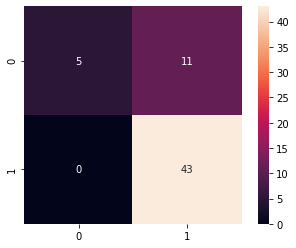

In [18]:
cf_matrix=confusion_matrix(y_test , svm_pred)
sns.heatmap(cf_matrix, annot=True,square=True)
print(classification_report(y_test , svm_pred)) 

## K-Nearest Neighbours

In [19]:
#Create a KNN Classifier
model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
y_predicted= model.predict(x_test)

In [20]:
knn_score = accuracy_score(y_test, y_predicted)
knn_score

0.8305084745762712

              precision    recall  f1-score   support

           0       0.88      0.44      0.58        16
           1       0.82      0.98      0.89        43

    accuracy                           0.83        59
   macro avg       0.85      0.71      0.74        59
weighted avg       0.84      0.83      0.81        59



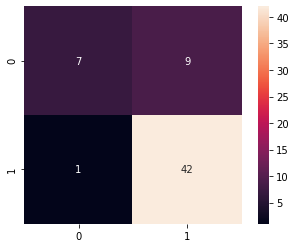

In [21]:
cf_matrix=confusion_matrix(y_test , y_predicted)
sns.heatmap(cf_matrix, annot=True,square=True)
print(classification_report(y_test , y_predicted)) 

## Decision Tree

In [22]:
#Create a KNN Classifier
model = DecisionTreeClassifier()
# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
y_predicted= model.predict(x_test)

In [23]:
dt_score = accuracy_score(y_test, y_predicted)
dt_score

0.8983050847457628

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.91      0.95      0.93        43

    accuracy                           0.90        59
   macro avg       0.88      0.85      0.87        59
weighted avg       0.90      0.90      0.90        59



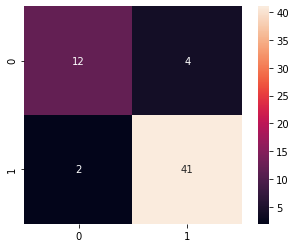

In [24]:
cf_matrix=confusion_matrix(y_test , y_predicted)
sns.heatmap(cf_matrix, annot=True,square=True)
print(classification_report(y_test , y_predicted)) 

## Logistic Regression

In [25]:
#Create a KNN Classifier
model = LogisticRegression()
# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
y_predicted= model.predict(x_test)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
lr_score = accuracy_score(y_test, y_predicted)
lr_score

0.847457627118644

              precision    recall  f1-score   support

           0       0.89      0.50      0.64        16
           1       0.84      0.98      0.90        43

    accuracy                           0.85        59
   macro avg       0.86      0.74      0.77        59
weighted avg       0.85      0.85      0.83        59



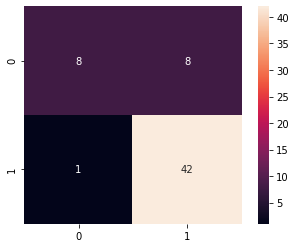

In [27]:
cf_matrix=confusion_matrix(y_test , y_predicted)
sns.heatmap(cf_matrix, annot=True,square=True)
print(classification_report(y_test , y_predicted)) 

## Comparison 

In [28]:
algos = ["KNN", "SVM", "Naive Bayes","DT","LR"]
scores = [knn_score, svm_score, nb_score,dt_score,lr_score]

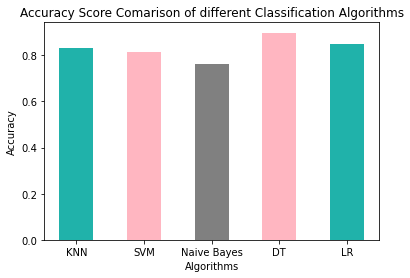

In [29]:
plt.bar(algos, scores, width=0.5,color = ['lightseagreen', 'lightpink','grey','lightpink','lightseagreen'])
plt.title("Accuracy Score Comarison of different Classification Algorithms")
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()